In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
num_class = 10
inpt_shape = (28,28,1)
(x_train , y_train) ,(x_test , y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train , x_test = x_train.astype('float32')/255 , x_test.astype('float32')/255

x_train ,x_test = np.expand_dims(x_train,-1) , np.expand_dims(x_test, -1)

x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train , y_test= keras.utils.to_categorical(y_train , num_class) , keras.utils.to_categorical(y_test , num_class)
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

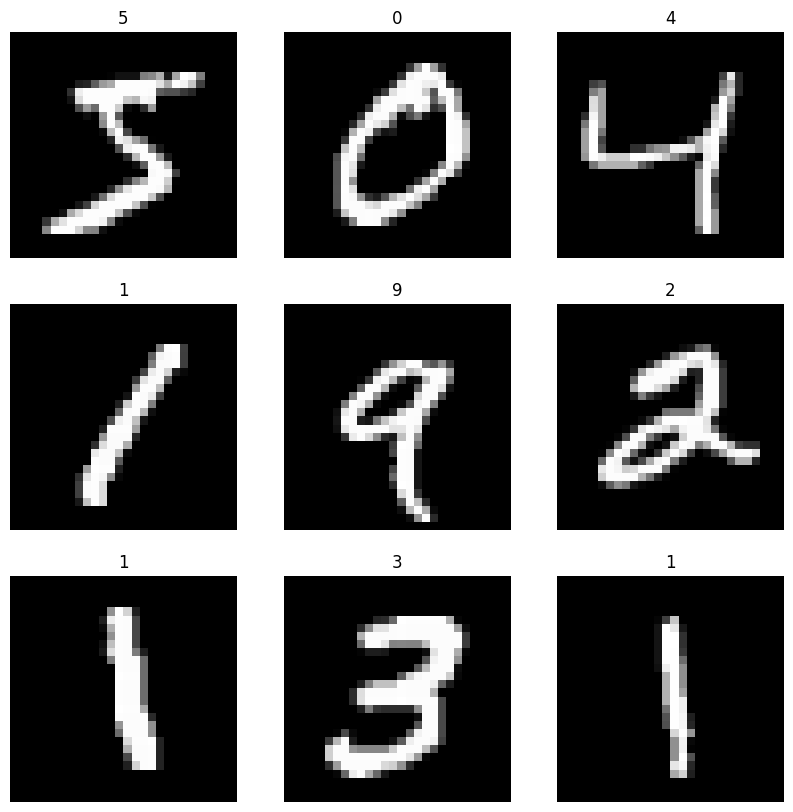

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
for i in range(9):
  ax=plt.subplot(3,3,i+1)
  plt.imshow(x_train[i,:,:,0] ,cmap='gray')
  plt.title(int(np.argmax(y_train[i])))
  plt.axis('off')

In [ ]:

model = keras.Sequential(
    [
        keras.Input(shape=inpt_shape),
        layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        layers.MaxPool2D(pool_size =(2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPool2D(pool_size =(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_class,activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size= 128
epochs=35

model.compile(loss='categorical_crossentropy' ,optimizer='nadam',metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2)

Epoch 1/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7542 - loss: 0.8053 - val_accuracy: 0.9721 - val_loss: 0.0997
Epoch 2/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9622 - loss: 0.1246 - val_accuracy: 0.9801 - val_loss: 0.0700
Epoch 3/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9703 - loss: 0.0944 - val_accuracy: 0.9827 - val_loss: 0.0609
Epoch 4/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9762 - loss: 0.0803 - val_accuracy: 0.9859 - val_loss: 0.0510
Epoch 5/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9795 - loss: 0.0656 - val_accuracy: 0.9866 - val_loss: 0.0481
Epoch 6/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9813 - loss: 0.0596 - val_accuracy: 0.9863 - val_loss: 0.0457
Epoch 7/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0566 - val_accuracy: 0.9879 - val_loss: 0.0426
Epoch 8/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0494 - val_accuracy: 0.

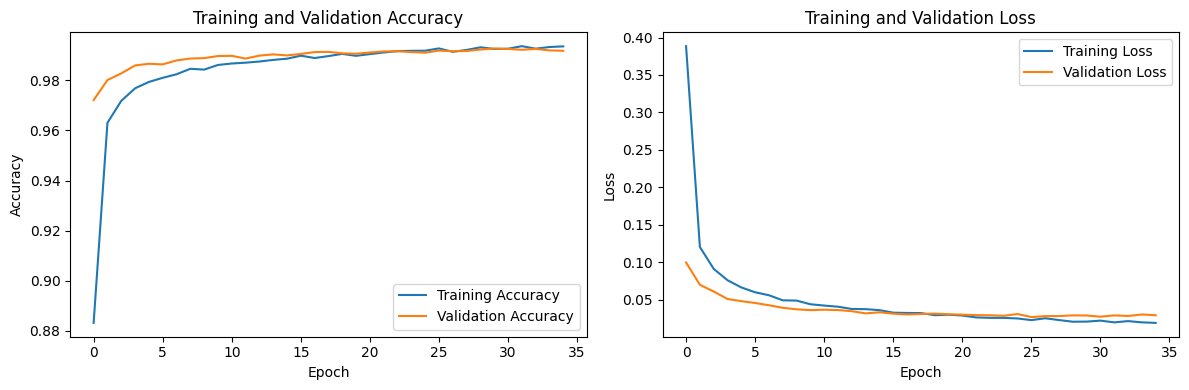

In [ ]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

batch_size = 50

optimizer = Adam(learning_rate=1e-3)
loss_fn = CategoricalCrossentropy()

train_acc_metrics=keras.metrics.CategoricalAccuracy()
val_acc_metrics=keras.metrics.CategoricalAccuracy()

x_val =x_train[-10000:]
y_val =y_train[-10000:]
x_train =x_train[:-10000]
y_train =y_train[:-10000]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

In [30]:
import time

epochs=10
for epoch in range(epochs):
  print(f'\n start epoch number : {epoch}')
  start_time =time.time()

  for step , (x_batch_train , y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      logits = model(x_batch_train , training = True)
      loss_value = loss_fn(y_batch_train , logits)
    grads = tape.gradient(loss_value , model.trainable_weights)
    optimizer.apply_gradients(zip(grads,model.trainable_weights))
    train_acc_metrics.update_state(y_batch_train,logits)

    if step %200 ==0:
      print(f'trainingloss (one batch) at step{step} is {float(loss_value)}')
      print(f'Seen so far for : {(step+1) * batch_size}')

  train_acc = train_acc_metrics.result()
  print(f'training acc over epoch : {float(train_acc)}')

  train_acc_metrics.reset_state()

  for x_batch_val , y_batch_val in val_dataset:
    val_logits = model(x_batch_val , training = False)
    val_acc_metrics.update_state(y_batch_val, val_logits)
  val_acc = val_acc_metrics.result()
  val_acc_metrics.reset_state()
  print(f'validation accuracy over epoch : {float(val_acc)}')
  print(f'time taken for epoch {epoch+1} is {time.time() - start_time} sec')


 start epoch number : 0
trainingloss (one batch) at step0 is 0.011812911368906498
Seen so far for : 50
trainingloss (one batch) at step200 is 0.00030402131960727274
Seen so far for : 10050
trainingloss (one batch) at step400 is 0.006864096503704786
Seen so far for : 20050
trainingloss (one batch) at step600 is 0.005061466712504625
Seen so far for : 30050
trainingloss (one batch) at step800 is 0.006001666653901339
Seen so far for : 40050
training acc over epoch : 0.9915800094604492
validation accuracy over epoch : 0.9901999831199646
time taken for epoch 1 is 65.00034499168396 sec

 start epoch number : 1
trainingloss (one batch) at step0 is 0.00039184794877655804
Seen so far for : 50
trainingloss (one batch) at step200 is 0.006583564914762974
Seen so far for : 10050
trainingloss (one batch) at step400 is 0.015719207003712654
Seen so far for : 20050
trainingloss (one batch) at step600 is 0.040333088487386703
Seen so far for : 30050
trainingloss (one batch) at step800 is 0.00134793506003